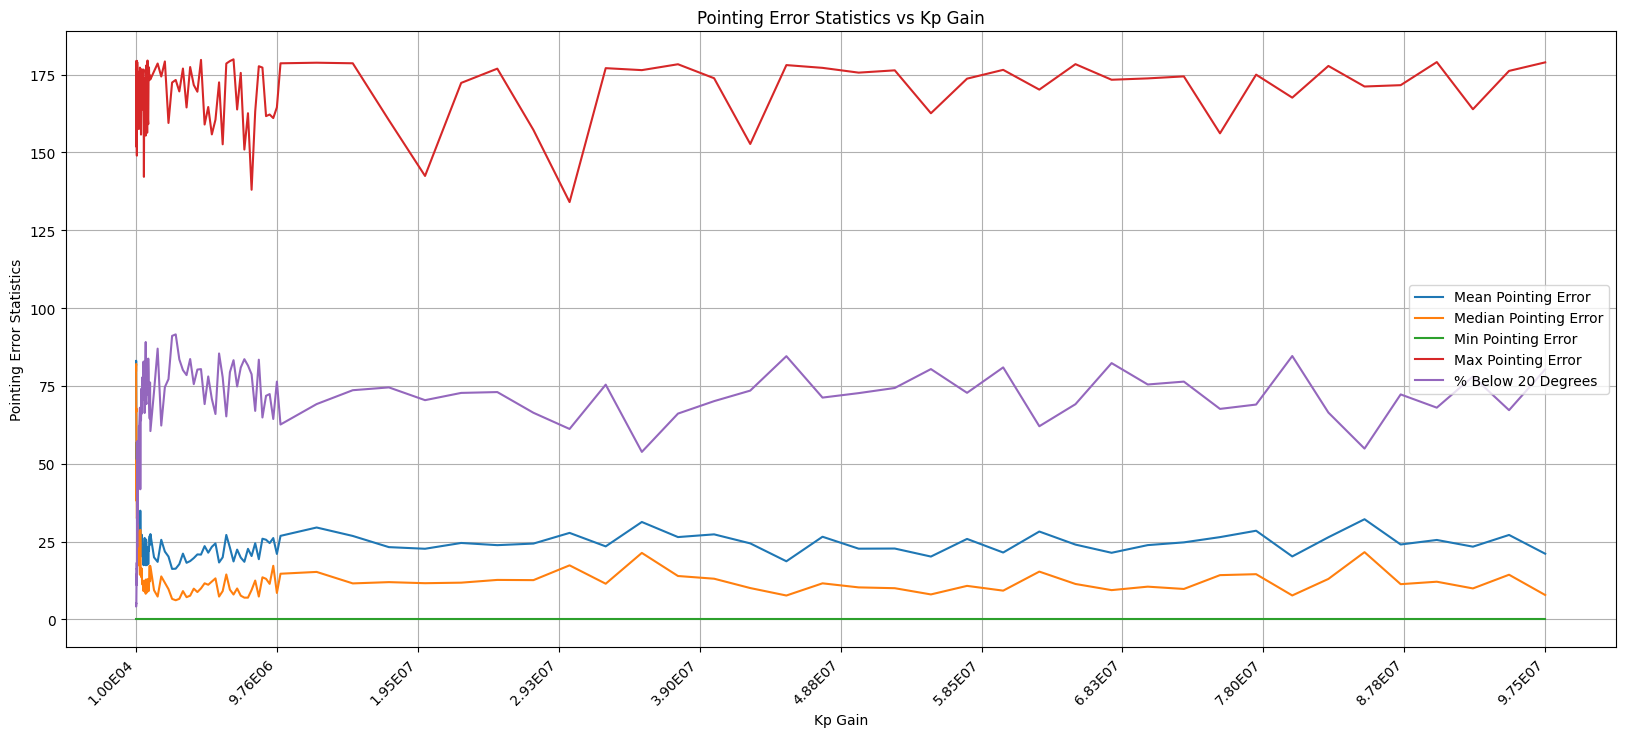

Top 10 Kp values with highest percentage below 20 degrees:
Kp: 2.75E06, Percentage Below 20 Degrees: 91.54%, Max Error: 173.26 degrees
Kp: 2.50E06, Percentage Below 20 Degrees: 91.05%, Max Error: 172.44 degrees
Kp: 6.75E05, Percentage Below 20 Degrees: 89.08%, Max Error: 155.39 degrees
Kp: 1.50E06, Percentage Below 20 Degrees: 86.96%, Max Error: 178.55 degrees
Kp: 5.75E06, Percentage Below 20 Degrees: 85.40%, Max Error: 172.50 degrees
Kp: 8.00E07, Percentage Below 20 Degrees: 84.59%, Max Error: 167.58 degrees
Kp: 4.50E07, Percentage Below 20 Degrees: 84.53%, Max Error: 178.04 degrees
Kp: 8.50E05, Percentage Below 20 Degrees: 83.75%, Max Error: 159.07 degrees
Kp: 3.75E06, Percentage Below 20 Degrees: 83.62%, Max Error: 177.41 degrees
Kp: 7.50E06, Percentage Below 20 Degrees: 83.57%, Max Error: 150.91 degrees


In [3]:
# plot the statistics
import matplotlib.pyplot as plt
import numpy as np
import math

def short_sci(x, decimals=2):
    if x == 0:
        return f"0E00"
    exp = int(math.floor(math.log10(abs(float(x)))))
    mantissa = float(x) / (10 ** exp)
    mantissa_str = f"{mantissa:.{decimals}f}"
    exp_str = f"{exp:02d}" if exp >= 0 else f"{exp:03d}"  # Handles negative exponents if needed
    return f"{mantissa_str}E{exp_str}"

data = np.loadtxt('gain_search_results20251204.txt', skiprows=1)
rng = range(0, len(data))  # change the range as needed
kp_vals_plot = data[rng,0]
mean_vals = data[rng,2]
median_vals = data[rng,3]
min_vals = data[rng,4]
max_vals = data[rng,5]
perc_vals = data[rng,6]

# figure
plt.figure(figsize=(20, 8))
plt.plot(kp_vals_plot, mean_vals, label='Mean Pointing Error')
plt.plot(kp_vals_plot, median_vals, label='Median Pointing Error')
plt.plot(kp_vals_plot, min_vals, label='Min Pointing Error')
plt.plot(kp_vals_plot, max_vals, label='Max Pointing Error')
plt.plot(kp_vals_plot, perc_vals, label='% Below 20 Degrees')
plt.xlabel('Kp Gain')
plt.ylabel('Pointing Error Statistics')
plt.title('Pointing Error Statistics vs Kp Gain')
plt.legend()
plt.grid(True)

# ticks and labels - use the short_sci function, python cannot handle printing these kinds of numbers in a readible and sensible way
xticks = np.linspace(np.min(kp_vals_plot), np.max(kp_vals_plot), 11)
xlabels = [short_sci(v) for v in xticks]
ax = plt.gca()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, rotation=45, ha='right')

plt.show()

# print ten kp values with highest percentage below 20 degrees
sorted_indices = np.argsort(-perc_vals)  # negative for descending order
print("Top 10 Kp values with highest percentage below 20 degrees:")
for i in range(10):
    idx = sorted_indices[i]
    print(f"Kp: {short_sci(kp_vals_plot[idx])}, Percentage Below 20 Degrees: {perc_vals[idx]:.2f}%, Max Error: {max_vals[idx]:.2f} degrees")

